In [1]:
import cv2
from matplotlib import pyplot as plt
import numpy as np

ModuleNotFoundError: No module named 'cv2'

In [11]:

def img_inp(file):
    #file = 'gray.jpeg'
    im = cv2.imread(file, cv2.IMREAD_GRAYSCALE)
    #imp = plt.imshow(im)
    #plt.axis("off")
    #plt.show()

    r = np.array(range(0,256))
    #print(intensities)

    frequencies = [0]*256
    #print(frequencies)

    img_val = np.array(im, dtype = np.uint8)
    #print(img_val.shape)
    
    rows,cols=img_val.shape

    for m in range(rows):
        for n in range(cols):
            val = img_val[m][n]
            frequencies[val] = frequencies[val] + 1
    
    return (im, r, frequencies, img_val)

### Histogram of the image

In [28]:
def img_hist(r, frequencies):
    
    #print(frequencies)

    plt.bar(r, height=frequencies)
    plt.title("Histogram of Input Image")
    plt.xlabel("Intensity levels")
    plt.ylabel("Frequency")

### Histogram Equalization

In [1]:
def img_hist_eq(img_val, frequencies, r):
    rows,cols = img_val.shape
    img_size = rows*cols
    
    prob = [x/img_size for x in frequencies]
    #print(prob)
    #plt.bar(r, prob)
    #plt.title("Input Image Histogram")
    #plt.xlabel("Input Intensity Levels - rk")
    #plt.ylabel("Probability of intensity level - P(rk)")
    return prob

In [2]:

##beginning histogram equalization
def hist_equ(prob):
    s = [0]*256
    for j in range(0,256):
        s[j] = round(255*(sum(prob[0:(j+1)])))
    
    s_prob = [0]*256

    i = 0
    while(i<=255):
        s_val = s[i]
        sum_p = 0
        while(i<=255 and s[i] == s_val):
            sum_p = sum_p + prob[i]
            i = i+1
        s_prob[s_val] = sum_p
    
    #print(sum(s_prob))
    #plt.bar(s, s_prob)
    #plt.title("Equalized Histogram")
    #plt.xlabel("Output Intensity levels - sk")
    #plt.ylabel("Probability - P(sk)")
    
    return (s,s_prob)

In [29]:
def equalized_img(img_val, s):
    rows,cols = img_val.shape

    eq_img = np.array([[0]*rows]*cols)

    eq_img.shape = rows,cols

    for i in range(0,rows):
        for j in range(0,cols):
            eq_img[i][j] = s[img_val[i][j]]
            
    return eq_img

In [ ]:
filename="gray.jpeg"
im, r, frequencies, img_val=img_inp(filename)

r_pro = img_hist_eq(img_val, frequencies, r)

In [ ]:
s, s_pro = hist_equ(r_pro)
    
eq_img = equalized_img(img_val, s)

### Histogram matching

In [ ]:
#input image equalized
file1 = "input.jpg"
im1, r, freq, img_val = img_inp(file1)
r_prob = img_hist_eq(img_val, freq, r)
s, s_pro = hist_equ(r_prob)

#plt.bar(s, s_pro)
#plt.title("Equalized histogram of input image")
#plt.show()

plt.bar(r, r_prob)
plt.title("histogram of input image")
plt.show()

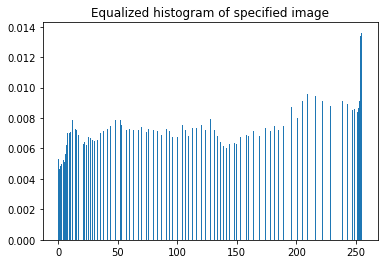

In [35]:
#specified image
file2 = "spec.jpg"
im2, z, freq2, img_val2 = img_inp(file2)
z_prob = img_hist_eq(img_val2, freq2, z)
q, q_prob = hist_equ(z_prob)

#plt.bar(q, q_prob)
#plt.title("Equalized histogram of specified image")
#plt.show()

plt.bar(z, z_prob)
plt.title("histogram of specified image")
plt.show()

In [26]:
zq = [0]*256
for j in range(0,256):
    #print("*s=", item, "    zq=", q[min(range(len(q)), key = lambda i : abs(q[i]-item))])
    zq[j] = min(range(len(q)), key = lambda i : abs(q[i]-s[j]))
    
    
zq_prob = [0]*256
for x in range(0,256):
    zq_prob[x] = z_prob[zq[x]]

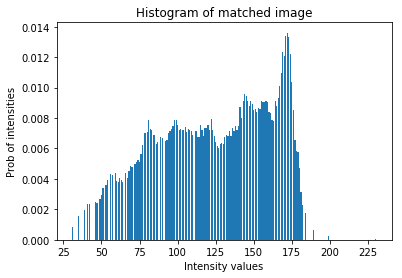

In [36]:
plt.bar(zq, zq_prob)
plt.xlabel("Intensity values")
plt.ylabel("Prob of intensities")
plt.title("Histogram of matched image")
plt.show()

In [ ]:
matched=equalized_img(img_val, zq)
plt.imshow(matched)
plt.axis("off")
plt.show()

In [ ]:
!pip install opencv-python